In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("MSE_by_pos_mic_outside.csv")

In [3]:
df

,Iteration,q_0,q_3,joint,MSE
0,0,-1.5708,-0.7,0,3.768751
1,0,-1.5708,-0.7,3,0.073300
2,0,-1.4708,-2.3,0,1.430450
3,0,-1.4708,-2.3,3,0.199202
4,0,-1.4708,-2.2,0,2.460531
...,...,...,...,...,...
1655,9,1.5292,-1.2,3,0.071313
1656,9,1.5292,-0.6,0,2.414401
1657,9,1.5292,-0.6,3,0.113426
1658,9,1.5296,-2.3,0,1.760329


In [4]:
grid_q0 = np.full((26,32), np.nan)
grid_q3 = np.full((26,32), np.nan)
x_poses = []
for idx, row in df.iterrows():
    x_pos = int(np.round((row.q_0 + 1.5708)/0.1,0))
    if x_pos < 0:
        continue
    x_poses.append(x_pos)
    y_pos = int(np.round((row.q_3 +0.3)/-0.1, 0))
    if row.joint == 0:
        grid_q0[y_pos, x_pos] = row.MSE
    if row.joint == 3:
        grid_q3[y_pos, x_pos] = row.MSE

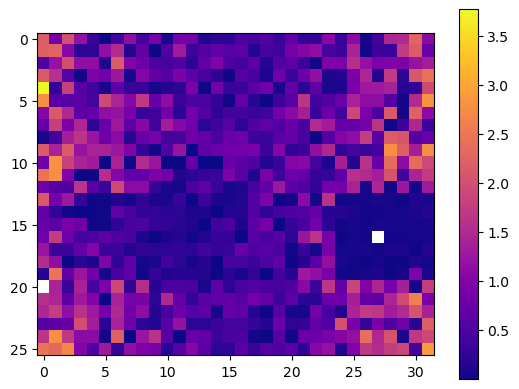

In [5]:
plt.imshow(grid_q0, cmap="plasma")
plt.colorbar()

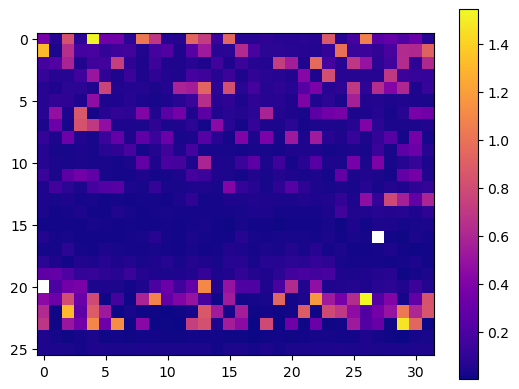

In [6]:
plt.imshow(grid_q3, cmap="plasma")
plt.colorbar()

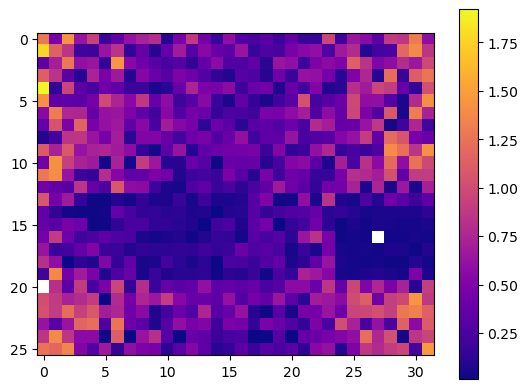

In [7]:
plt.imshow((grid_q0 + grid_q3)/2, cmap="plasma")
plt.colorbar()

(0.0, 1.5)

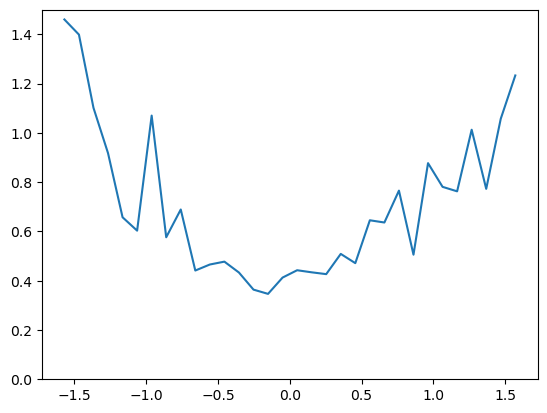

In [8]:
MSE_q0 = np.nanmean(grid_q0, axis=0)
plt.plot(np.linspace(-1.57, 1.57, 32), MSE_q0)
plt.ylim((0,1.5))

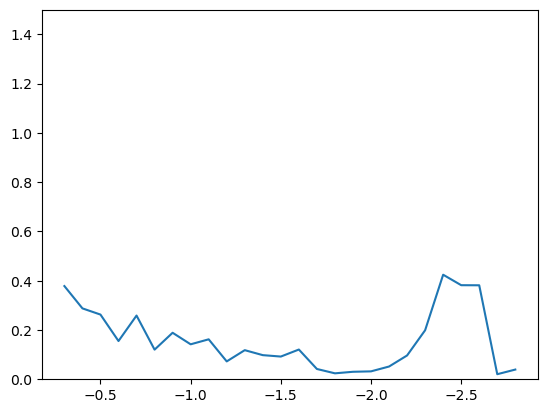

In [9]:
MSE_q3 = np.nanmean(grid_q3, axis=1)
plt.plot(-0.3-0.1*np.arange(26), MSE_q3)
plt.ylim((0,1.5))
plt.gca().xaxis.set_inverted(True)